<a href="https://colab.research.google.com/github/Yoshani/Pump-It-Up/blob/master/Pump_It_Up_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

# plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [ ]:
def make_mi_scores(X, y):
    X_mi = X.copy()
    y_mi = y.copy()
    for colname in X_mi.select_dtypes(["object", "category"]):
        X_mi[colname], _ = X_mi[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X_mi.dtypes]
    mi_scores = mutual_info_classif(X_mi, y_mi.values.ravel(), discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Get datasets

In [ ]:
features_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TrainingSet.csv", 
    index_col="id",
    low_memory=False
)
labels_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TrainingLabels.csv", 
    index_col="id"
)
test_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TestSet.csv", 
    index_col="id",
    low_memory=False
)

In [ ]:
X = features_df.copy()
y = labels_df.copy()
X_test = test_df.copy()

# Feature Selection

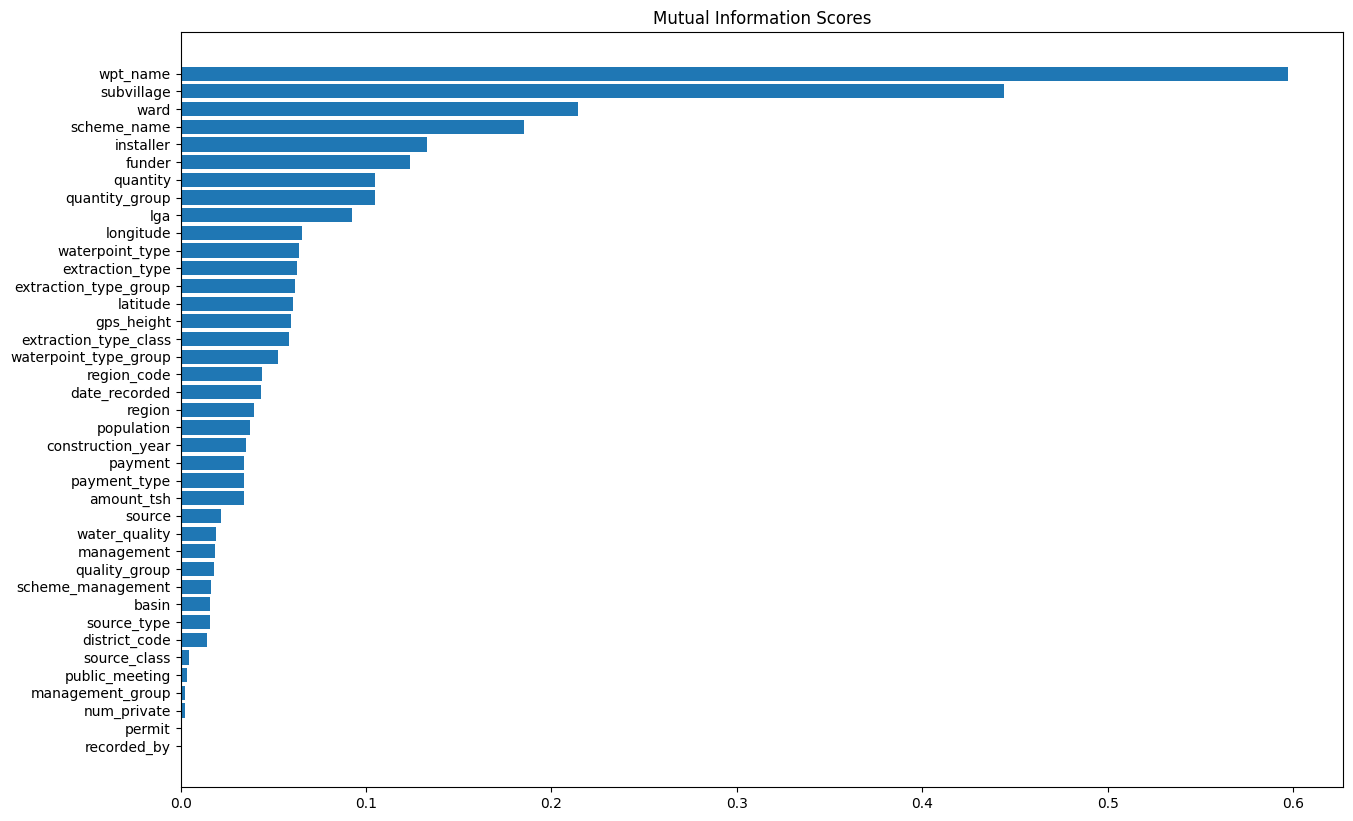

In [ ]:
mi_scores = make_mi_scores(features_df, labels_df)
plt.figure(dpi=100, figsize=(15, 10))
plot_mi_scores(mi_scores.head(40))

Numerical attributes

In [ ]:
numerical_df = features_df.select_dtypes(["int", "float"])
numerical_df.head(2)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010


In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit_transform(X=numerical_df, y=labels_df.values.ravel())
cols = numerical_df.columns[fs.get_support(indices=True)].tolist()

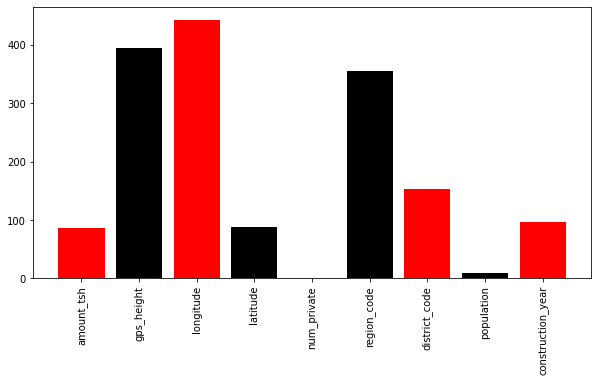

In [ ]:
# plot the scores
plt.subplots(figsize=(10, 5))
pyplot.bar(cols, fs.scores_, color=['red', 'black'])
plt.xticks(rotation = 90)
pyplot.show()

Categorical attributes

In [ ]:
categorical_df = features_df.select_dtypes(["object", "category"])
categorical_df.head(2)

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
for colname in categorical_df:
    categorical_df[colname], _ = categorical_df[colname].factorize()

label = labels_df.copy()
label['status_group'], _ = label['status_group'].factorize()

In [ ]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(categorical_df, label)
categorical_df_fs = fs.transform(categorical_df)
cols = categorical_df.columns[fs.get_support(indices=True)].tolist()

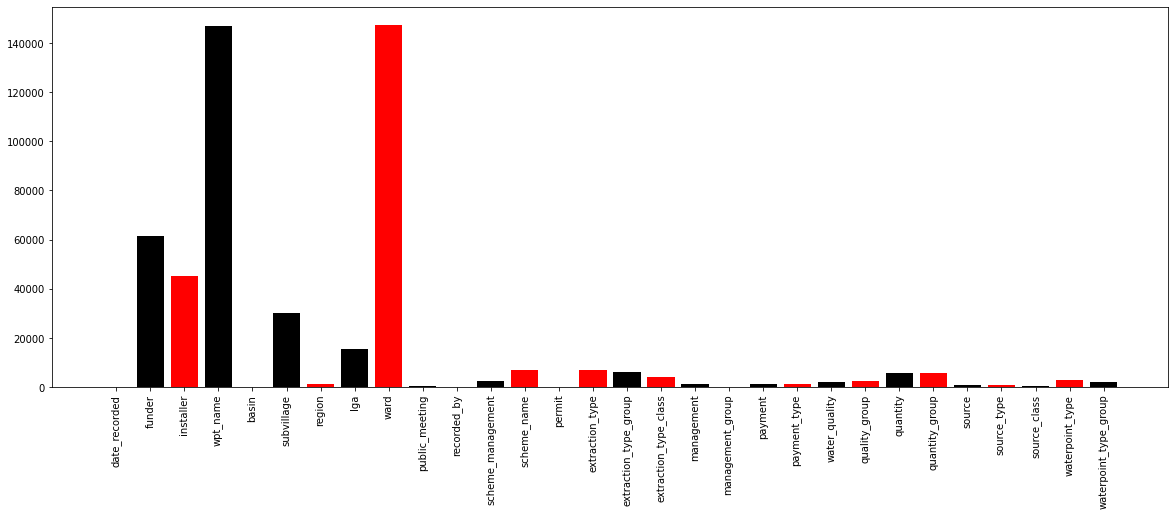

In [ ]:
# scores for the features
# for i in range(len(fs.scores_)):
# 	print(cols[i],': %f' % (fs.scores_[i]))

# plot the scores
plt.subplots(figsize=(20, 7))
pyplot.bar(cols, fs.scores_, color=['red', 'black'])
plt.xticks(rotation = 90)
pyplot.show()